## Observable trends for weather as we approach the equator:

1) Temperature: The biggest correlation is between lower latitudes and lower temperatures in the Southern hemisphere. A strong correlation still occurs with temperatures in the Northern hemisphere, however here the highest temperatures are around 20° latitude.

2) Humidity: Global humidity levels are clustered above 60%. This could be misleading based on the data available, as we used information for cities (and specifically those above 500 population). The methodology of seeking cities based on randomised co-ordinates means that a large number of those initial co-ordinates would correspond to a location in the ocean and then be associated with the nearest city, hence a large number of coastal cities could skew the data to include more humid coastal places.

3) Weaker correlations: There were only weak correlations for winds speeds, cloudiness and humidity relative to latitude, across both hemispheres.



In [2]:
#Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import random
import scipy.stats as st

# API keys
from config import weather_key


#COLLECTING THE DATA

In [2]:
city_list = []
for i in range(1600): #1600 gives ~600
    random_latitude = round(random.uniform(-90, 90), 6)
    random_longitude = round(random.uniform(-180, 180), 6)
    city = citipy.nearest_city(random_latitude, random_longitude).city_name
    if city not in city_list:
        city_list.append(city)
print(len(city_list))

659


In [3]:
# Making the API request based on the unique city list
retrieved_data = []
num = 1

for city in city_list:
# Components for the url
    url = "https://api.openweathermap.org/data/2.5/weather?"
    api_key = weather_key
    # Replace any spaces from the city names so the url functions
    city_format = city.replace(" ", "%20")
    query_url = f"{url}q={city_format}&appid={api_key}&units=Metric"

    print(f"City no {num}: = {city}. Saving city data.")

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Check to see if each city is not found. Otherwise saving the relevant data for that city 
    if weather_json['cod'] == '404':
        print("Error. Unable to locate that city.")
    else: 
        city_name = weather_json['name']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp']
        hum = weather_json['main']['humidity']
        clds = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']

        retrieved_data.append({"City":city_name, "Lat":lat, "Lng":lng, "Max Temp": max_temp, "Humidity": hum, "Cloudiness": clds, "Wind Speed":wind_speed, "Country": country, "Date": date})
        
        num += 1

City no 1: = asau. Saving city data.
City no 2: = karakendzha. Saving city data.
Error. Unable to locate that city.
City no 2: = albany. Saving city data.
City no 3: = santa rosa. Saving city data.
City no 4: = dikson. Saving city data.
City no 5: = nieuw amsterdam. Saving city data.
City no 6: = hermanus. Saving city data.
City no 7: = punta arenas. Saving city data.
City no 8: = ribeira grande. Saving city data.
City no 9: = grafenau. Saving city data.
City no 10: = yatou. Saving city data.
City no 11: = nargana. Saving city data.
City no 12: = matrei. Saving city data.
Error. Unable to locate that city.
City no 12: = victoria. Saving city data.
City no 13: = haines junction. Saving city data.
City no 14: = jamestown. Saving city data.
City no 15: = rio gallegos. Saving city data.
City no 16: = kysyl-syr. Saving city data.
City no 17: = gamba. Saving city data.
City no 18: = tiksi. Saving city data.
City no 19: = puerto del rosario. Saving city data.
City no 20: = killarney. Saving c

City no 157: = madarounfa. Saving city data.
City no 158: = flinders. Saving city data.
City no 159: = hithadhoo. Saving city data.
City no 160: = kiama. Saving city data.
City no 161: = bur gabo. Saving city data.
Error. Unable to locate that city.
City no 161: = atar. Saving city data.
City no 162: = krasnoselkup. Saving city data.
City no 163: = saint-georges. Saving city data.
City no 164: = aketi. Saving city data.
City no 165: = lerwick. Saving city data.
City no 166: = mar del plata. Saving city data.
City no 167: = torbay. Saving city data.
City no 168: = pereslavl-zalesskiy. Saving city data.
City no 169: = nome. Saving city data.
City no 170: = halvad. Saving city data.
City no 171: = kavieng. Saving city data.
City no 172: = amderma. Saving city data.
Error. Unable to locate that city.
City no 172: = boquira. Saving city data.
City no 173: = chama. Saving city data.
City no 174: = strezhevoy. Saving city data.
City no 175: = magaria. Saving city data.
City no 176: = talnakh.

City no 328: = borogontsy. Saving city data.
City no 329: = baykit. Saving city data.
City no 330: = meulaboh. Saving city data.
City no 331: = leshan. Saving city data.
City no 332: = dekar. Saving city data.
City no 333: = pacific grove. Saving city data.
City no 334: = abong mbang. Saving city data.
City no 335: = aguilas. Saving city data.
City no 336: = middelburg. Saving city data.
City no 337: = hecelchakan. Saving city data.
City no 338: = tucupita. Saving city data.
City no 339: = evensk. Saving city data.
City no 340: = savannah bight. Saving city data.
City no 341: = ampanihy. Saving city data.
City no 342: = chamba. Saving city data.
City no 343: = san luis de la paz. Saving city data.
City no 344: = katangli. Saving city data.
City no 345: = turan. Saving city data.
City no 346: = rafai. Saving city data.
City no 347: = oistins. Saving city data.
City no 348: = aflu. Saving city data.
Error. Unable to locate that city.
City no 348: = coahuayana. Saving city data.
City no 3

City no 491: = okha. Saving city data.
City no 492: = cayenne. Saving city data.
City no 493: = lolua. Saving city data.
Error. Unable to locate that city.
City no 493: = kangaatsiaq. Saving city data.
City no 494: = dongfeng. Saving city data.
City no 495: = isangel. Saving city data.
City no 496: = vila franca do campo. Saving city data.
City no 497: = belaya gora. Saving city data.
City no 498: = west bay. Saving city data.
City no 499: = gisborne. Saving city data.
City no 500: = cocobeach. Saving city data.
City no 501: = mujiayingzi. Saving city data.
City no 502: = cheremnoye. Saving city data.
City no 503: = payo. Saving city data.
City no 504: = talakan. Saving city data.
City no 505: = hambantota. Saving city data.
City no 506: = bijar. Saving city data.
City no 507: = lata. Saving city data.
City no 508: = karabulak. Saving city data.
City no 509: = vavozh. Saving city data.
City no 510: = dzaoudzi. Saving city data.
City no 511: = sao lourenco do sul. Saving city data.
City

In [6]:
# Assigning the retrieved data to weather info
#weather_info = pd.DataFrame(retrieved_data)
#print(f"The number of unique cities selected is {len(weather_info)}.")
#weather_info.head()

#This was only run the first time after retrieving weather info from the API

In [3]:
# As an alternative to running the API multiple times, I have instead loaded the CSV file with weather_info
weather_info = pd.read_csv("output_data\weather_data.csv")

In [4]:
# Displaying Summary statistics
weather_info.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,6.050000e+02
mean,21.092676,23.883190,19.943289,67.454545,59.677686,3.821471,1.655621e+09
std,33.127920,88.876269,8.778066,21.966033,40.433130,2.408014,2.414794e+02
min,-54.800000,-179.166700,-3.970000,1.000000,0.000000,0.000000,1.655620e+09
25%,-6.050000,-56.154900,12.840000,53.000000,16.000000,1.930000,1.655621e+09
50%,24.757000,25.716700,20.860000,72.000000,75.000000,3.300000,1.655621e+09
75%,48.883200,105.823000,26.840000,84.000000,100.000000,5.230000,1.655621e+09
max,78.218600,179.316700,40.160000,100.000000,100.000000,13.230000,1.655621e+09


Inspect the data and remove the cities where the humidity > 100%. As the max humidity is 100, 
there are no cities that need to be removed

In [5]:
weather_info.to_csv("output_data\weather_data.csv", encoding='utf-8', index=False) 

#PLOTTING THE DATA

*Latitude Vs Max Temperature (C) Plot*

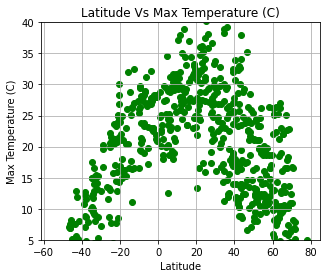

In [6]:
plt.figure(figsize=(5,4))
plt.scatter(weather_info["Lat"], weather_info["Max Temp"], color='g')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude Vs Max Temperature (C)')
plt.savefig("output_data\LatVsTemp.png")
plt.ylim(5,40)
plt.grid()
plt.show()

The datapoints show a general increase in temperature closer to the equator, with the highest values occuring around 20° latitute.

*Latitude Vs Humidity (%) Plot*

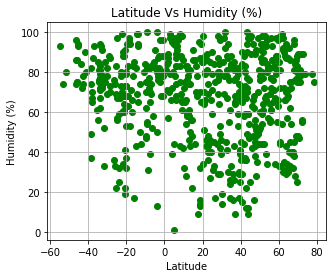

In [7]:
plt.figure(figsize=(5,4))
plt.scatter(weather_info["Lat"], weather_info["Humidity"], color='g')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude Vs Humidity (%)')
plt.savefig("output_data\LatVsHum.png")
plt.grid()
plt.show()


Most of the humidity values are above 60%.

*Latitude Vs Cloudiness (%) Plot*

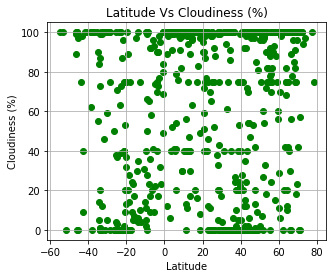

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(weather_info["Lat"], weather_info["Cloudiness"], color='g')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude Vs Cloudiness (%)')
plt.savefig("output_data\LatVsCld.png")
plt.grid()
plt.show()

It seems the data points cluster around certain bands of values, e.g. 40% and 100%, implying a lot of the data was rounded heavily.

*Latitude Vs Wind Speed (mph) Plot*

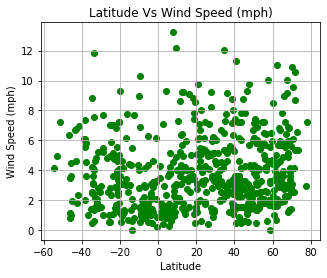

In [9]:
plt.figure(figsize=(5,4))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude Vs Wind Speed (mph)')
plt.grid()
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], color='g')
plt.savefig("output_data\LatVsWindSpeed.png")
plt.show()

Wind speeds are spread fairly evenly by hemisphere.

In [10]:
# Sorting the weather information into Northern and Southern Hemisphere sets

N_hemi = weather_info.loc[weather_info["Lat"] > 0]
S_hemi = weather_info.loc[weather_info["Lat"] <= 0]


#LINEAR REGRESSION

*Northern Hemisphere - Latitude Vs Max Temp (C) Linear Regression*

The r-value is: -0.6494937969977947


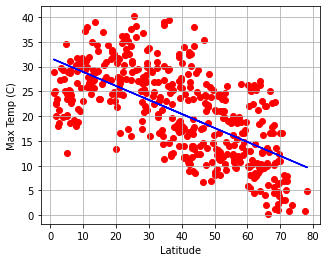

In [11]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Max Temp"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.savefig("output_data\LatVsMaxTempN.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 3]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

*Southern Hemisphere - Latitude Vs Max Temp (C) Linear Regression*

The r-value is: 0.7957185798698447


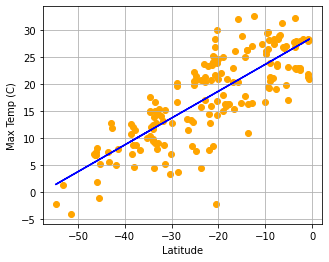

In [22]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Max Temp"], color='orange')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.savefig("output_data\LatVsMaxTempS.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 3]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

There is a fairly strong correlation between Northern hemisphere temperature and closeness to the equator and an even stronger correlation occurs between lower latitudes and lower temperatures in the Southern hemisphere.

*Northern Hemisphere - Latitude Vs Humidity (%) Linear Regression*

The r-value is: -0.02238117523204253


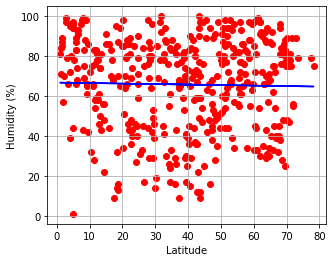

In [13]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Humidity"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data\LatVsHumN.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 4]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

*Southern Hemisphere - Latitude Vs Humidity (%) Linear Regression*

The r-value is: -0.07131345097210313


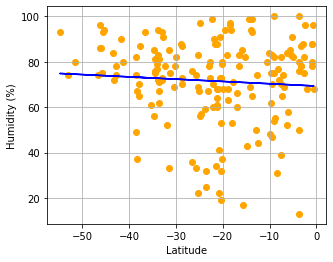

In [23]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Humidity"], color='orange')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data\LatVsHumS.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 4]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

The correlation between humidity and latitude are very weak in both hemispheres.

*Northern Hemisphere - Latitude Vs Cloudiness (%) Linear Regression*

The r-value is: 0.018153954054670962


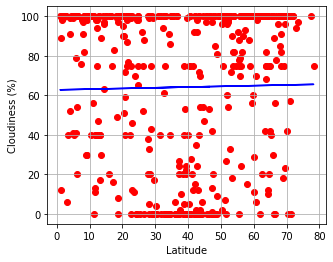

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Cloudiness"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data\LatVsCldN.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 5]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

 *Southern Hemisphere - Latitude Vs Cloudiness (%) Linear Regression*

The r-value is: -0.09675764445914557


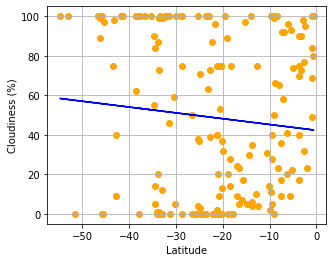

In [24]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Cloudiness"], color='orange')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data\LatVsCldS.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 5]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

The correlations between cloudiness and latitude are very weak in both the Northern and Southern hemispheres.

*Northern Hemisphere - Latitude Vs Wind Speed (mph) Linear Regression*

The r-value is: 0.11372565522505093


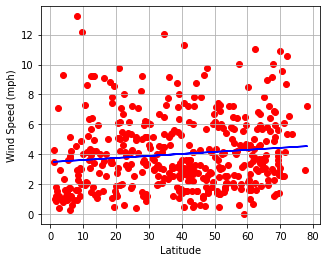

In [17]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Wind Speed"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data\LatVsWindSpeedN.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 6]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

*Southern Hemisphere - Latitude Vs Wind Speed (mph) Linear Regression*

The r-value is: -0.22160490736814137


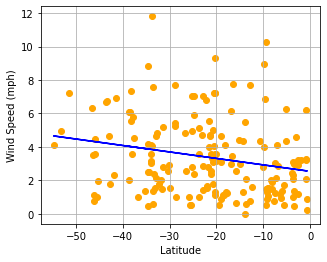

In [25]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Wind Speed"], color='orange')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data\LatVsWindSpeedS.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 6]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

The correlation between wind speeds and latitude is very weak in the Northern hemisphere and the negative correlation is still quite weak but stronger in the Southern hemisphere.